# Linear Regression - prediction of car prices
### To build a multiple linear regression model for the prediction of car prices

# Data understanding and preparation

In [1]:
# Import the required python modules
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the given data set into a data frame
pd_carprice = pd.read_csv('CarPrice_Assignment.csv', encoding='ISO-8859-1')

In [3]:
# Look at first 5 records
pd_carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### CarName contains both Company Name and Model Name.  We will extract Company name and use it as independent variable for model building

In [4]:
pd_carprice['company'] = pd_carprice['CarName'].apply(lambda x:x.split()[0])
pd_carprice['company'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: company, dtype: object

In [5]:
# Let us check the unique company names
print(pd_carprice['company'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


##### We can see that some typos or wrong values resulting in multiple names for the same company, Let us list them and correct the data.

- 'vokswagen' 'volkswagen' 'vw' **for** 'volkswagen'

- 'toyota' 'toyouta' **for** 'toyota'

- 'maxda' 'mazda' **for** 'mazda'

- 'porsche' 'porcshce' **for** 'porsche'

- 'Nissan' 'nissan' **for** 'nissan'


In [6]:
pd_carprice.loc[pd_carprice.company == 'vokswagen', 'company'] = 'volkswagen'
pd_carprice.loc[pd_carprice.company == 'vw', 'company'] = 'volkswagen'
pd_carprice.loc[pd_carprice.company == 'toyouta', 'company'] = 'toyota'
pd_carprice.loc[pd_carprice.company == 'porcshce', 'company'] = 'porsche'
pd_carprice.loc[pd_carprice.company == 'maxda', 'company'] = 'mazda'
pd_carprice.loc[pd_carprice.company == 'Nissan', 'company'] = 'nissan'

In [7]:
# Let us check the unique company names after cleaning the data
print(pd_carprice['company'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [8]:
# Let us drop CarName feature as we have created company feature using CarName
pd_carprice = pd_carprice.drop('CarName', axis=1)

In [10]:
# Look for duplicates
pd_carprice.loc[pd_carprice.duplicated()]

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company


#### We have no duplicate records

In [11]:
# Let us look at the variables for missing values.
pd_carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

#### We do not any variables with null values.

In [12]:
pd_carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
pd_carprice.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'company'],
      dtype='object')

# Numeric variables 
   - symboling, wheelbase, carlength, carwidth, carheight, curbweight, enginesize, 
     boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price
                    
# Categorical or character variables 
   - 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 
     'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem' 

# Exploratory Data Analysis

### - Univariate Analysis

Text(0, 0.5, 'Frequency')

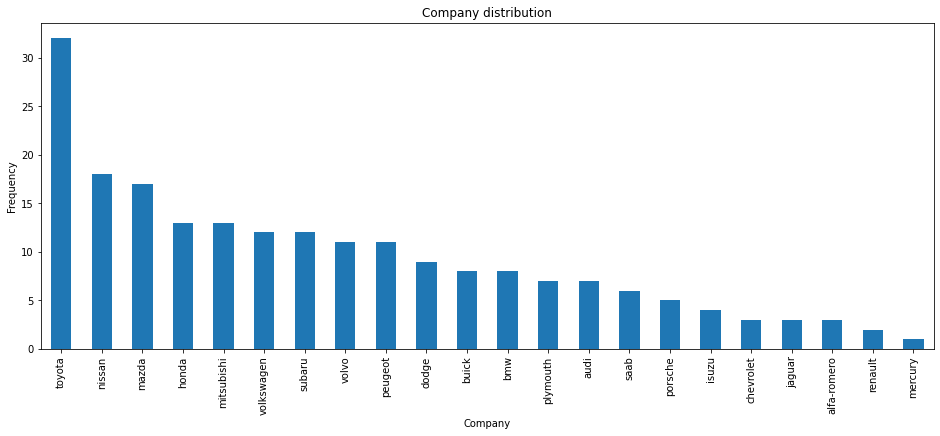

In [31]:
# Let us plot distributions for Univariate Analysis - Value counts by company name
plt.figure(figsize=(16,6))
pd_carprice['company'].value_counts().plot(kind='bar')
plt.title('Company distribution')
plt.xlabel('Company')
plt.ylabel('Frequency')

#### Toyota has the highest number of reords in our data frame

Text(0, 0.5, 'Frequency')

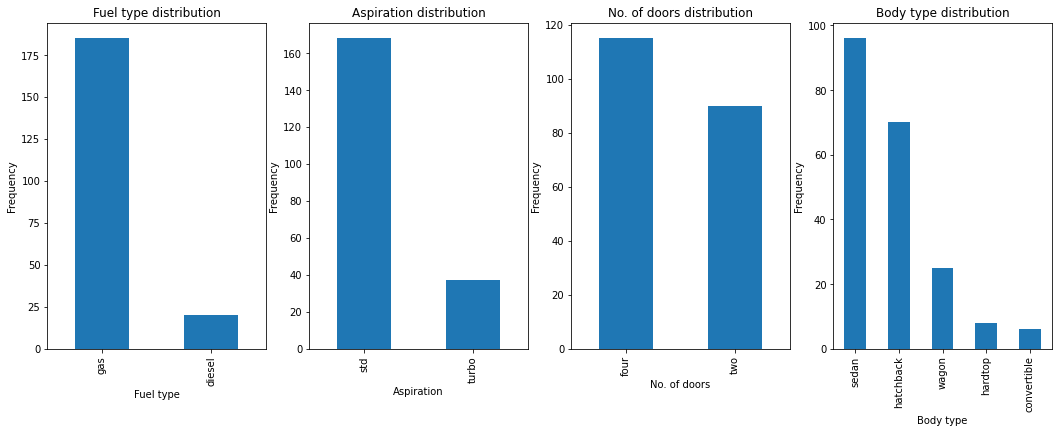

In [43]:
# Let us plot distributions for Univariate Analysis - Fuel Type, Aspiration, No. of doors, Body type
plt.figure(figsize=(18,6))
plt.subplot(1,4,1)
pd_carprice.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel type distribution')
plt.xlabel('Fuel type')
plt.ylabel('Frequency')

plt.subplot(1,4,2)
pd_carprice.aspiration.value_counts().plot(kind='bar')
plt.title('Aspiration distribution')
plt.xlabel('Aspiration')
plt.ylabel('Frequency')

plt.subplot(1,4,3)
pd_carprice.doornumber.value_counts().plot(kind='bar')
plt.title('No. of doors distribution')
plt.xlabel('No. of doors')
plt.ylabel('Frequency')

plt.subplot(1,4,4)
pd_carprice.carbody.value_counts().plot(kind='bar')
plt.title('Body type distribution')
plt.xlabel('Body type')
plt.ylabel('Frequency')

#### We an see larger number of cars are on gas fuel type, aspiration wise larger number of are on standard engine, number of doors wise not a huge difference but we see more cars with four doors, it's close between sedan and hatchback based on body type

Text(0, 0.5, 'Frequency')

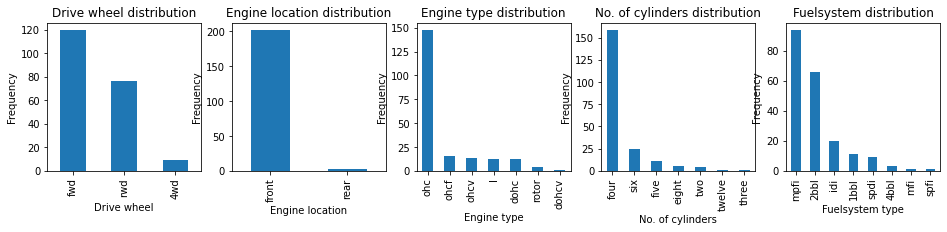

In [44]:
# Let us plot distributions for Univariate Analysis - drive wheel, engine location, engine type, cylinder number and fuel system
plt.figure(figsize=(16,6))
plt.subplot(2,5,1)
pd_carprice.drivewheel.value_counts().plot(kind='bar')
plt.title('Drive wheel distribution')
plt.xlabel('Drive wheel')
plt.ylabel('Frequency')

plt.subplot(2,5,2)
pd_carprice.enginelocation.value_counts().plot(kind='bar')
plt.title('Engine location distribution')
plt.xlabel('Engine location')
plt.ylabel('Frequency')

plt.subplot(2,5,3)
pd_carprice.enginetype.value_counts().plot(kind='bar')
plt.title('Engine type distribution')
plt.xlabel('Engine type')
plt.ylabel('Frequency')

plt.subplot(2,5,4)
pd_carprice.cylindernumber.value_counts().plot(kind='bar')
plt.title('No. of cylinders distribution')
plt.xlabel('No. of cylinders')
plt.ylabel('Frequency')

plt.subplot(2,5,5)
pd_carprice.fuelsystem.value_counts().plot(kind='bar')
plt.title('Fuelsystem distribution')
plt.xlabel('Fuelsystem type')
plt.ylabel('Frequency')

####  From the above charts we can see that more number cars on front wheel drive, clear leading by front side engine location, ohc engine type is the mostly used engine type, mostly four cylinders among the cars data provided, slightly close numbers between mpfi and 2bbl fuel systems types.


# - Bivariate Analysis

Text(0, 0.5, 'Average Price')

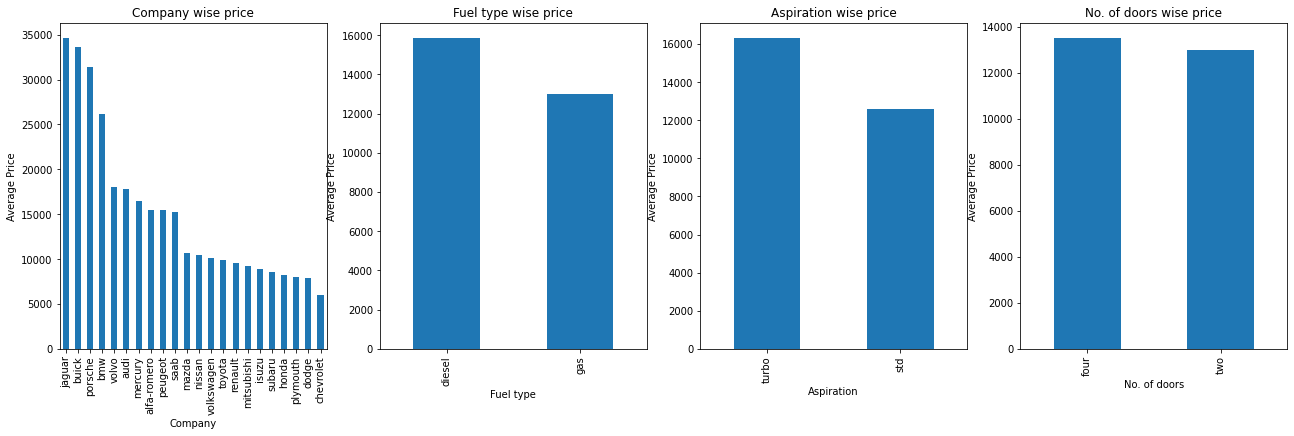

In [49]:
# As the target variable for our model is price, let us perform bivariate analysis of other independent 
# variables against dependent variable price
plt.figure(figsize=(22,6))
plt.subplot(1,4,1)
pd_carprice.groupby('company')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Company wise price')
plt.xlabel('Company')
plt.ylabel('Average Price')

plt.subplot(1,4,2)
pd_carprice.groupby('fueltype')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Fuel type wise price')
plt.xlabel('Fuel type')
plt.ylabel('Average Price')

plt.subplot(1,4,3)
pd_carprice.groupby('aspiration')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Aspiration wise price')
plt.xlabel('Aspiration')
plt.ylabel('Average Price')

plt.subplot(1,4,4)
pd_carprice.groupby('doornumber')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('No. of doors wise price')
plt.xlabel('No. of doors')
plt.ylabel('Average Price')

#### Among the data provided, most expensive cars are of jaguar brand closely followed by buick, porsche and bmw.  Please note our analysis is only limited to the data available.  On the other variables like fuel type, aspiration, number of doors the gap is not huge.

Text(0, 0.5, 'Average Price')

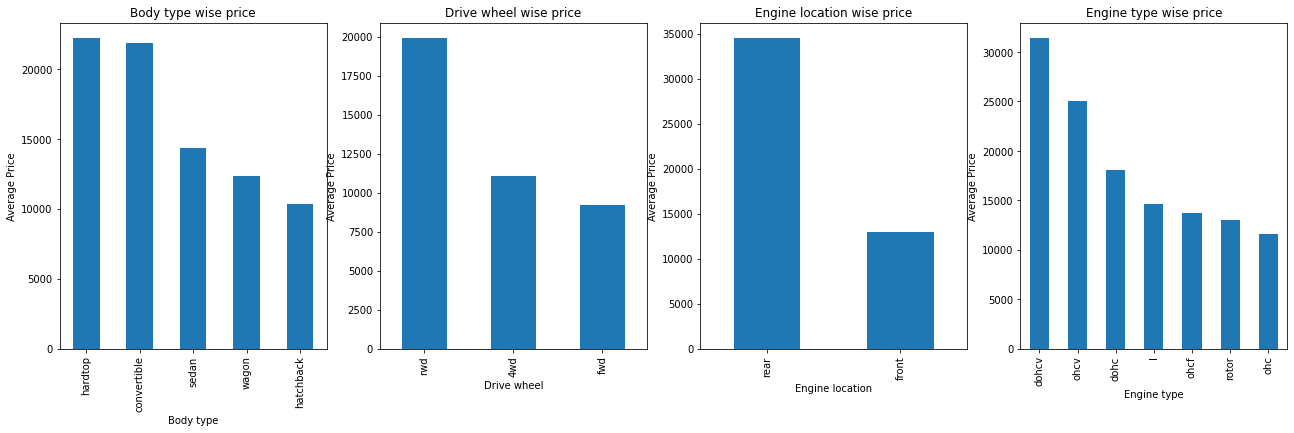

In [52]:
plt.figure(figsize=(22,6))
plt.subplot(1,4,1)
pd_carprice.groupby('carbody')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Body type wise price')
plt.xlabel('Body type')
plt.ylabel('Average Price')

plt.subplot(1,4,2)
pd_carprice.groupby('drivewheel')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Drive wheel wise price')
plt.xlabel('Drive wheel')
plt.ylabel('Average Price')

plt.subplot(1,4,3)
pd_carprice.groupby('enginelocation')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Engine location wise price')
plt.xlabel('Engine location')
plt.ylabel('Average Price')

plt.subplot(1,4,4)
pd_carprice.groupby('enginetype')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Engine type wise price')
plt.xlabel('Engine type')
plt.ylabel('Average Price')

#### From the above charts we can see that by body type wise hardtop and convertible body type cars are expensive, rare wheel drive vehicles are expensive when compared to front wheel drive and 4 wheel drives, cars with engine located at rear are more expensive than the cars with engine located at the front.  Based on the engine types too the car price changes.

Text(0, 0.5, 'Average price')

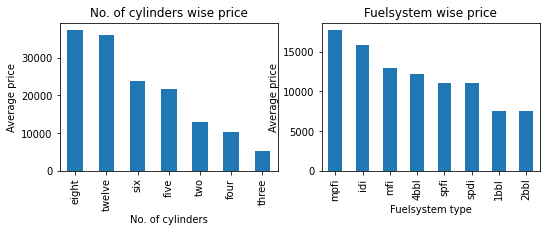

In [53]:
plt.figure(figsize=(18,6))
plt.subplot(2,4,1)
pd_carprice.groupby('cylindernumber')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('No. of cylinders wise price')
plt.xlabel('No. of cylinders')
plt.ylabel('Average price')

plt.subplot(2,4,2)
pd_carprice.groupby('fuelsystem')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Fuelsystem wise price')
plt.xlabel('Fuelsystem type')
plt.ylabel('Average price')

#### Cars with eight cylinder engines and twelve cylinder engines are more expensive, like wise based on the fuelsystem too the carprice changes.

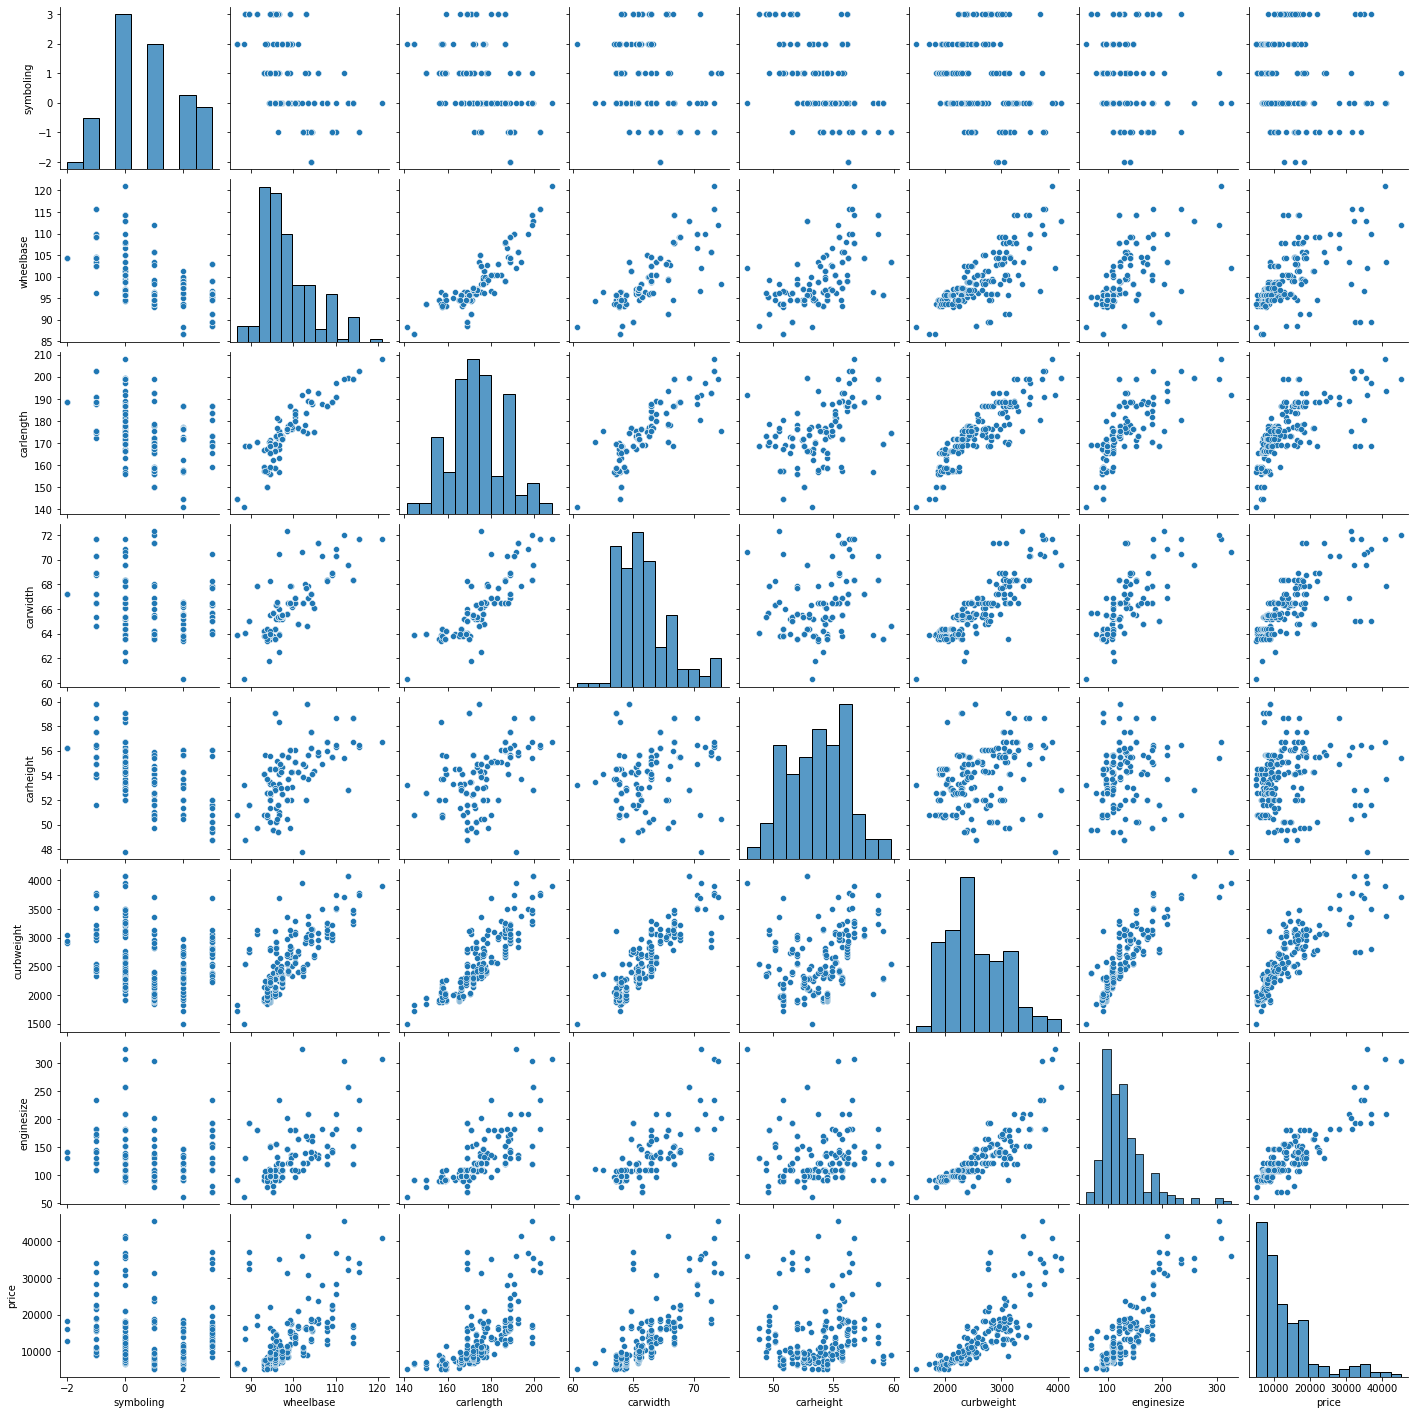

In [54]:
# Let us do pairplot in two groups so that the plot are clearly visible
pd_pairplot1 = pd_carprice[['symboling','wheelbase', 'carlength','carwidth', 'carheight', 'curbweight', 
                           'enginesize','price']]
sns.pairplot(pd_pairplot1)

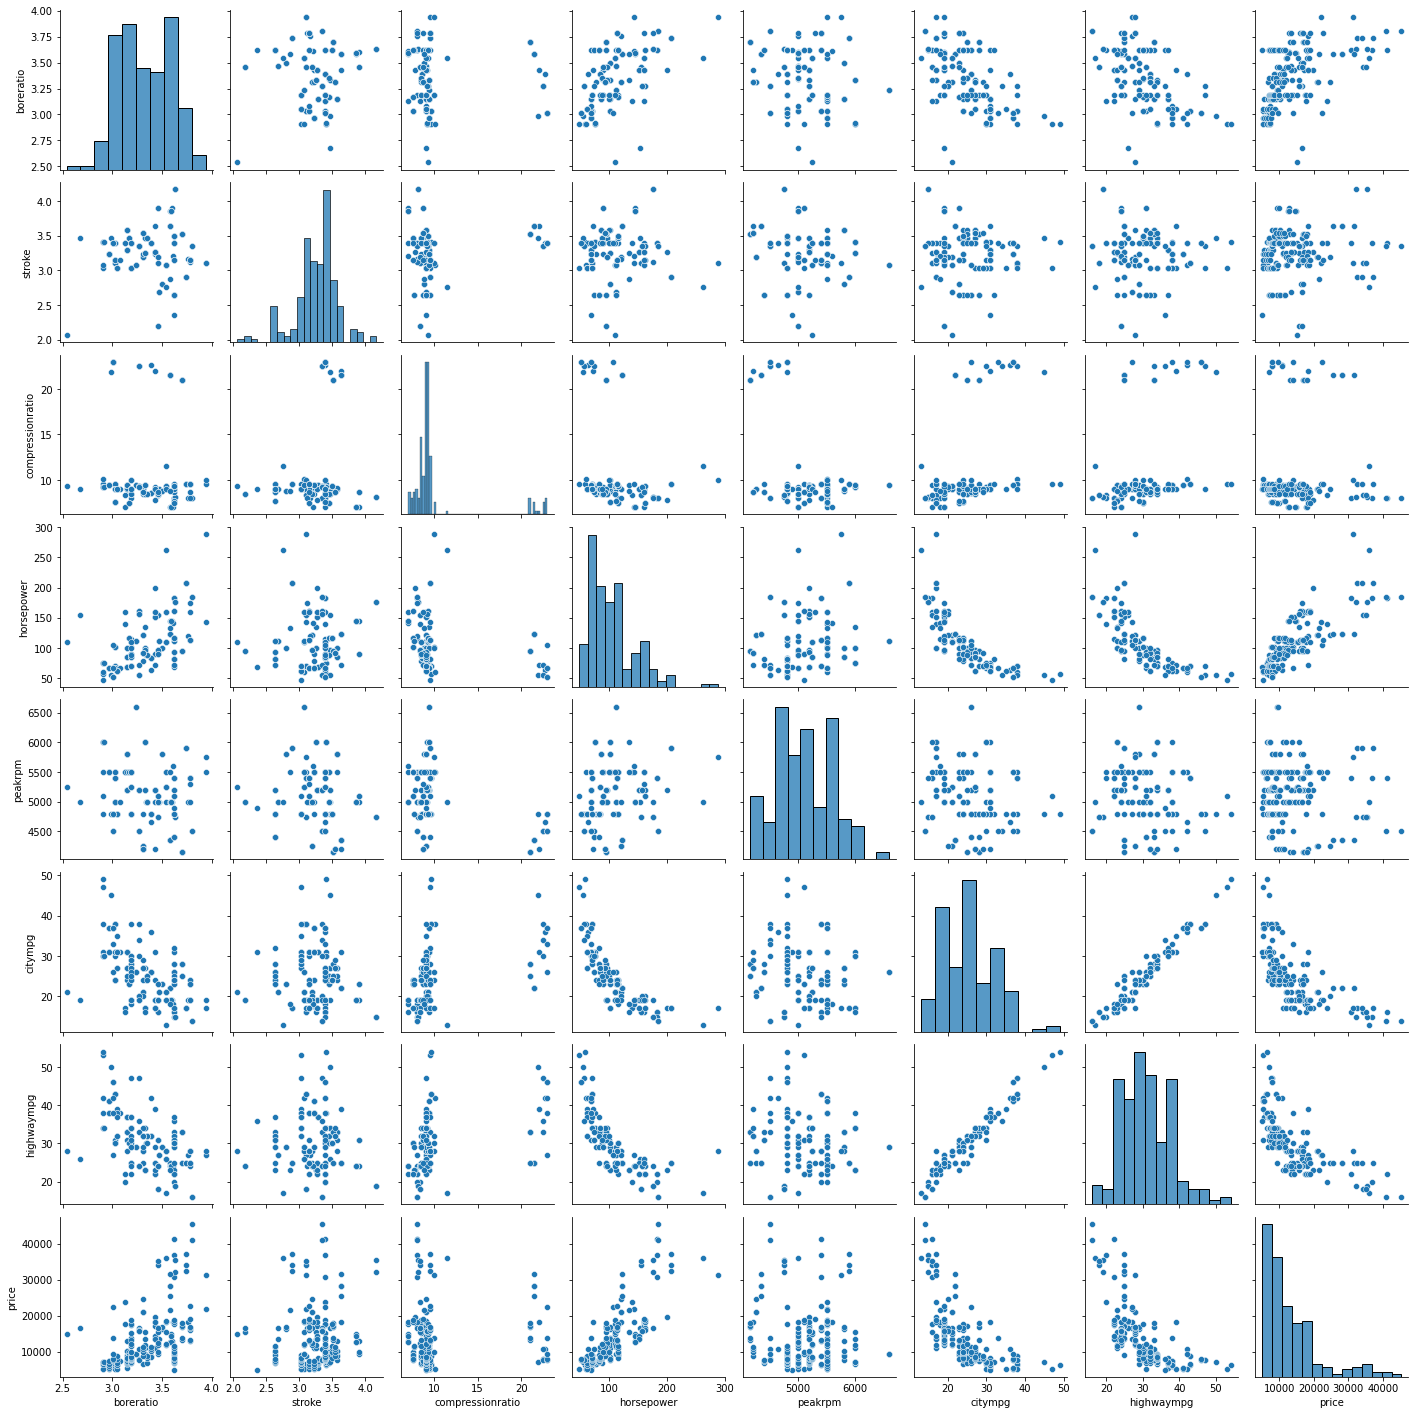

In [55]:
pd_pairplot2 = pd_carprice[['boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 
                           'citympg', 'highwaympg', 'price']]
sns.pairplot(pd_pairplot2)

**From the above pair plots we can see that price is positively correlated with below variables:**

  - wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower

**Below variables are not significant against price:**

  - carheight 

**Below variables are negatively correlated against price:**

  - citympg and highwaympg (Fuel economy - Miles per gallon)

In [56]:
# Let us check the number of unique values for categorical variables
# 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 
# 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'
print('Unique - fuel types :', len(pd_carprice['fueltype'].unique()))
print('Unique - aspiration types :', len(pd_carprice['aspiration'].unique()))
print('Unique - number of doors types :', len(pd_carprice['doornumber'].unique()))
print('Unique - body types :', len(pd_carprice['carbody'].unique()))
print('Unique - drivewheel types :', len(pd_carprice['drivewheel'].unique()))
print('Unique - engine locations :', len(pd_carprice['enginelocation'].unique()))
print('Unique - engine types :', len(pd_carprice['enginetype'].unique()))
print('Unique - cylinder number sizes :', len(pd_carprice['cylindernumber'].unique()))
print('Unique - fuel systems :', len(pd_carprice['fuelsystem'].unique()))

Unique - fuel types : 2
Unique - aspiration types : 2
Unique - number of doors types : 2
Unique - body types : 5
Unique - drivewheel types : 3
Unique - engine locations : 2
Unique - engine types : 7
Unique - cylinder number sizes : 7
Unique - fuel systems : 8


In [57]:
# As we need to fill dummy variables for multiple categorical variables
# Let us create a function for filling dummy variables
def fill_dummy_variables(var, df):
    status = pd.get_dummies(df[var],drop_first=True)
    df = pd.concat([df, status], axis=1)
    df = df.drop(var,axis=1) 
    return df

In [58]:
# Let us create dummy variables for categorical variables
# 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 
# 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'
pd_carprice = fill_dummy_variables('fueltype', pd_carprice)
pd_carprice = fill_dummy_variables('aspiration', pd_carprice)
pd_carprice = fill_dummy_variables('carbody', pd_carprice)
pd_carprice = fill_dummy_variables('drivewheel', pd_carprice)
pd_carprice = fill_dummy_variables('enginelocation', pd_carprice)
pd_carprice = fill_dummy_variables('enginetype', pd_carprice)
pd_carprice = fill_dummy_variables('cylindernumber', pd_carprice)
pd_carprice = fill_dummy_variables('fuelsystem', pd_carprice)

In [59]:
# As we end up having two columns with title "two", we will rename columns for doornumber when they get created
# and hence adding the dummy columns for doornumber variable separately.
status = pd.get_dummies(pd_carprice['doornumber'],drop_first=True)
status.columns = ['two_door']
pd_carprice = pd.concat([pd_carprice, status], axis=1)
pd_carprice = pd_carprice.drop('doornumber',axis=1) 

In [60]:
pd_carprice.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,two_door
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,1,0,0,1
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,1,0,0,1
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,1,0,0,1
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,1,0,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,1,0,0,0


In [61]:
pd_carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,two_door
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,...,0.004878,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878,0.439024
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,...,0.069843,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843,0.497483
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that except for car_ID and company, all the variables are scaled to perfection

# Model building and evaluation

In [62]:
# Let us create a new data frame for modeling without 'car_ID' and 'company',
# car_ID is not required for modeling and company variable holds character data
pd_model = pd_carprice
pd_model.drop('car_ID', axis=1, inplace=True)
pd_model.drop('company', axis=1, inplace=True)

In [63]:
# Let us split the given data set into train and test sets in 70/30 ratio
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(pd_model, train_size = 0.7, test_size = 0.3, random_state = 100)

In [64]:
# Let us use the RFE (Recursive Feature Elimination) to pick the 10 most relevant features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
y_train = df_train.pop('price')
X_train = df_train

In [65]:
# Let us scale the numerical variables with high values using MinMaxScaler
# symboling, wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio, 
#  stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['symboling', 'wheelbase','carlength','carwidth','carheight','curbweight', 'enginesize', 'boreratio', 
            'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

pd_carprice.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,two_door
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,1,0,0,1
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,1,0,0,1
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,1,0,0,1
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,1,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,1,0,0,0


In [66]:
# Model the train set
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)            
rfe = rfe.fit(X_train, y_train)

In [67]:
# Let us look at the rankings given by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 21),
 ('wheelbase', False, 12),
 ('carlength', False, 13),
 ('carwidth', True, 1),
 ('carheight', False, 23),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 5),
 ('stroke', True, 1),
 ('compressionratio', False, 4),
 ('horsepower', True, 1),
 ('peakrpm', False, 8),
 ('citympg', False, 19),
 ('highwaympg', False, 18),
 ('gas', False, 7),
 ('turbo', False, 20),
 ('hardtop', False, 15),
 ('hatchback', False, 14),
 ('sedan', False, 17),
 ('wagon', False, 16),
 ('fwd', False, 25),
 ('rwd', False, 22),
 ('rear', True, 1),
 ('dohcv', False, 24),
 ('l', False, 27),
 ('ohc', False, 2),
 ('ohcf', False, 11),
 ('ohcv', False, 6),
 ('rotor', True, 1),
 ('five', False, 28),
 ('four', False, 9),
 ('six', False, 32),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('2bbl', False, 31),
 ('4bbl', False, 26),
 ('idi', False, 3),
 ('mfi', False, 34),
 ('mpfi', False, 30),
 ('spdi', False, 10),
 ('spfi', False, 33),
 ('two_door', False, 29)]

In [68]:
# Let us look at RFE recommended variables
selected_col = X_train.columns[rfe.support_]
selected_col

Index(['carwidth', 'curbweight', 'enginesize', 'stroke', 'horsepower', 'rear',
       'rotor', 'three', 'twelve', 'two'],
      dtype='object')

In [69]:
# Let us look at RFE recommended variables
not_selected_cols = X_train.columns[~rfe.support_]
not_selected_cols

Index(['symboling', 'wheelbase', 'carlength', 'carheight', 'boreratio',
       'compressionratio', 'peakrpm', 'citympg', 'highwaympg', 'gas', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'five', 'four', 'six', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'spfi', 'two_door'],
      dtype='object')

In [70]:
X_train_final = X_train[selected_col]   # RFE selected variables
print(X_train_final.columns)

Index(['carwidth', 'curbweight', 'enginesize', 'stroke', 'horsepower', 'rear',
       'rotor', 'three', 'twelve', 'two'],
      dtype='object')


In [71]:
# Import the python modules for modeling
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
# Model 1
# Add the constant
X_train_final = sm.add_constant(X_train_final)

# Run the linear model
lm = sm.OLS(y_train,X_train_final).fit() 

# Print the linear model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     95.07
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           1.64e-53
Time:                        19:19:15   Log-Likelihood:                -1340.7
No. Observations:                 143   AIC:                             2701.
Df Residuals:                     133   BIC:                             2731.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.8083   1041.244     -0.033      0.9

In [73]:
# Model 2
# Drop the variable horsepower which is insignificant as per p-value
X_train_final = X_train_final.drop('horsepower', axis=1)

# Run the linear model
lm = sm.OLS(y_train,X_train_final).fit() 

# Print the linear model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     106.2
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           3.58e-54
Time:                        19:19:45   Log-Likelihood:                -1341.6
No. Observations:                 143   AIC:                             2701.
Df Residuals:                     134   BIC:                             2728.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.5304   1042.769      0.030      0.9

In [74]:
# Model 3
# Drop the variable curbweight which is insignificant as per p-value
X_train_final = X_train_final.drop('curbweight', axis=1)

# Run the linear model
lm = sm.OLS(y_train,X_train_final).fit() 

# Print the linear model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     119.7
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           1.05e-54
Time:                        19:19:57   Log-Likelihood:                -1342.9
No. Observations:                 143   AIC:                             2702.
Df Residuals:                     135   BIC:                             2725.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.0576   1047.658      0.085      0.9

In [75]:
# As all the p-values are below 0.05, let us look at VIF's - after Model - 3
vif = pd.DataFrame()
X = X_train_final
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,rotor,inf
8,two,inf
0,const,17.65
2,enginesize,3.76
1,carwidth,2.88
7,twelve,1.42
3,stroke,1.17
4,rear,1.12
6,three,1.05


In [76]:
# Model 4
# Drop the variable rotor which has inifinite VIF
X_train_final = X_train_final.drop('rotor', axis=1)

# Run the linear model
lm = sm.OLS(y_train,X_train_final).fit() 

# Print the linear model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     119.7
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           1.05e-54
Time:                        19:20:23   Log-Likelihood:                -1342.9
No. Observations:                 143   AIC:                             2702.
Df Residuals:                     135   BIC:                             2725.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.0576   1047.658      0.085      0.9

In [77]:
# As all the p-values are below 0.05, let us look at VIF's - after Model - 4
vif = pd.DataFrame()
X = X_train_final
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.65
2,enginesize,3.76
1,carwidth,2.88
6,twelve,1.42
3,stroke,1.17
7,two,1.16
4,rear,1.12
5,three,1.05


In [78]:
# Now after model -4 , we have all the remianing variables below acceptable p-value of 0.05
# And the VIF is below 5 for the remaining variables.
print(X_train_final.columns)

Index(['const', 'carwidth', 'enginesize', 'stroke', 'rear', 'three', 'twelve',
       'two'],
      dtype='object')


In [79]:
# Now, let us predict the train values
y_train_pred = lm.predict(X_train_final)

# Residual Analysis

Text(0.5, 0, 'Errors')

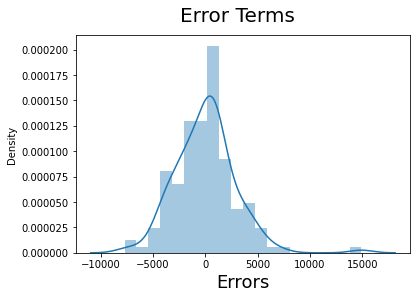

In [80]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18) 

#### From the above plot we can see that error terms are distributed normally. 

In [81]:
# Now let us perform the predictions on test set
# Let us look at the columns of test set
df_test.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'gas',
       'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six',
       'three', 'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi',
       'spfi', 'two_door'],
      dtype='object')

In [82]:
# Let us define the test set
y_test = df_test.pop('price')
X_test = df_test

In [83]:
# Scaling of numerical variables from test set
num_vars = ['symboling', 'wheelbase','carlength','carwidth','carheight','curbweight', 'enginesize', 'boreratio', 
            'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [84]:
# Drop the const variable from the copy of the train frame which will be used for creating test frame
# as it is not available in the test data
X_train_copy = X_train_final
X_train_copy = X_train_copy.drop('const',axis=1)

In [85]:
# Let us restrict the test set to the columns of final train set
X_test_final = X_test[X_train_copy.columns]
print(X_test_final.columns)

Index(['carwidth', 'enginesize', 'stroke', 'rear', 'three', 'twelve', 'two'], dtype='object')


In [86]:
# Adding a constant variable 
X_test_final = sm.add_constant(X_test_final)

In [87]:
# Now predict the test values
y_test_pred = lm.predict(X_test_final)

In [88]:
from sklearn.metrics import r2_score

r2_score(y_test, y_test_pred)

0.879126637222484

#### We can see that test set r2_score is at 0.87 and is closer to train set r2_score of 0.86.

(8.8, 0.1)

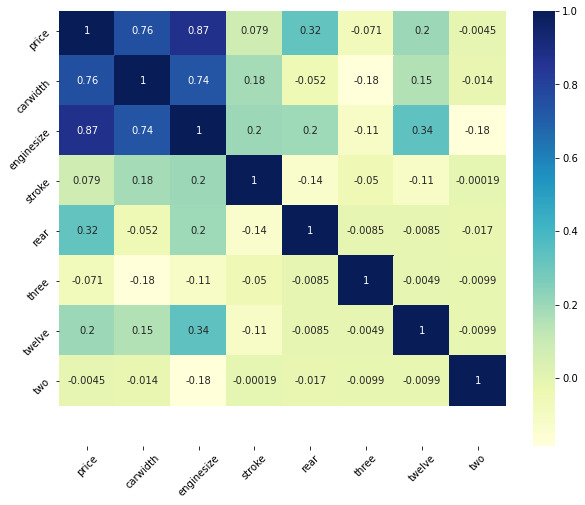

In [89]:
# Let us look at the heatmap of variables selected by the model.
# Examine how these variables affect the price of car
# Let us create a new data frame with the seleted variables along with price which is a target variable
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
df_corr = pd_carprice[['price', 'carwidth', 'enginesize', 'stroke', 'rear', 'three', 'twelve', 'two']]
# Columns titled 'two', 'three' and 'twelve' are representing two cylinders, three cylinders and 
# twelve cylinders respectively.

sns.heatmap(df_corr.corr(),annot=True, cmap='YlGnBu')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.set_ylim(8.8, 0.1)

# 1. Which variables are significant in predicting the price of a car
      From the model we can see that variables 'enginesize', 'carwidth', 'rear wheel drive', 'twelve cylinders', 'stroke', 'three cylinders' and 'two cylinders' are  significant in predicting the price of a car. 
# 2. How well those variables describe the price of a car
      From the heatmap we can say that:
      - variables 'enginesize', 'carwidth', 'rear (wheel drive)', 'tweleve (cylinders)' and 'stroke' 
        are positively correlated with price.
      - variables 'three (cylinders)' and 'two (cylinders)' are slightly negatively correlated with price.